# Practica 4: Detección Multicolinealidad

## Multicolinealidad

In [1]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
from wooldridge import *

In [2]:
datos=dataWoo("hprice1")
y=datos["lprice"]
vars=["llotsize", "lsqrft", "bdrms"]
X=datos[vars]

mco1 = sm.OLS(y, sm.add_constant(X)).fit()
mco1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     50.42
Date:                Mon, 09 Nov 2020   Prob (F-statistic):           9.74e-19
Time:                        21:27:07   Log-Likelihood:                 25.861
No. Observations:                  88   AIC:                            -43.72
Df Residuals:                      84   BIC:                            -33.81
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2970      0.651     -1.992      0.050      -2.592      -0.002
llotsize       0.1680      0.038      4.388      0.000       0.092       0.244
lsqrft         0.7002      0.093      7.540      0.000       0.516       0.885
bdrms          0.0370      0.028      1.342      0.183      -0.018       0.092
==============================================================================
Omnibus:                       12.060   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               34.889
Skew:                          -0.188   Prob(JB):                     2.65e-08
Kurtosis:                       6.062   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3]:
mco1.condition_number #Número de Condición

409.5147462574724

In [4]:
import statsmodels.stats.outliers_influence as oi

vifs=[oi.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vifs

[284.46202849274715, 320.08665791337097, 22.243172883072834]

In [5]:
vars

['llotsize', 'lsqrft', 'bdrms']

In [6]:
corr_matrix=np.corrcoef(X.T)
print(corr_matrix)

[[1.         0.31129925 0.16949022]
 [0.31129925 1.         0.51957927]
 [0.16949022 0.51957927 1.        ]]


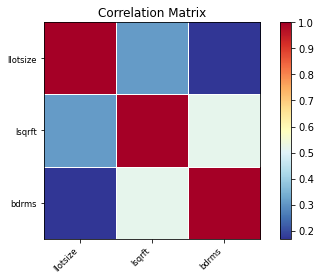

In [7]:
import statsmodels.graphics.api as smg
smg.plot_corr(corr_matrix, xnames=["llotsize", "lsqrft", "bdrms"])
plt.show()

In [10]:
#Datos de Theil
import pandas as pd
datos = pd.read_csv('Theil.csv', delimiter=";")

y=datos['consume']
X=datos[['income', 'relprice']]
mco2 = sm.OLS(y, sm.add_constant(X)).fit()
mco2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                consume   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     136.7
Date:                Mon, 09 Nov 2020   Prob (F-statistic):           6.51e-10
Time:                        21:27:29   Log-Likelihood:                -51.647
No. Observations:                  17   AIC:                             109.3
Df Residuals:                      14   BIC:                             111.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        130.7066     27.094      4.824      0.000      72.595     188.818
income         1.0617      0.267      3.981      0.001       0.490       1.634
relprice      -1.3830      0.084    -16.501      0.000      -1.563      -1.203
==============================================================================
Omnibus:                        0.802   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.670   Jarque-Bera (JB):                0.666
Skew:                          -0.031   Prob(JB):                        0.717
Kurtosis:                       2.032   Cond. No.                     2.58e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
vifs=[oi.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifs)
corr_matrix=np.corrcoef(X.T)
print(corr_matrix)

[23.43203500693295, 23.43203500693301]
[[1.         0.17884669]
 [0.17884669 1.        ]]
